In [145]:
import pandas as pd 
import numpy as np 
import sklearn
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import  matplotlib.pyplot as plt

In [146]:
data = pd.read_csv("D:\Data Science\Assignment\Assignment 14\Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [147]:
data.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [148]:
df = pd.get_dummies(data,columns=['Undergrad','Marital.Status','Urban'],drop_first=True)
df = df.astype(int)
df.head(6)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
5,33329,116382,0,0,0,0,0


In [149]:
min_income = df['Taxable.Income'].min()
max_income = df['Taxable.Income'].max()
avg_income = df['Taxable.Income'].mean()
print(min_income,max_income,avg_income)

10003 99619 55208.375


In [150]:
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10003,55208,99619], labels = ["Risky","Good"])
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Risky
2,36925,160205,30,0,1,0,1,Risky
3,50190,193264,15,1,0,1,1,Risky
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Risky
598,98592,180083,17,1,1,0,0,Good


In [151]:
df = pd.get_dummies(df,columns = ["TaxInc"],drop_first=True)
df.drop(columns='Taxable.Income',inplace=True)
df = df.astype(int)
df

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,50047,10,0,0,1,1,1
1,134075,18,1,0,0,1,0
2,160205,30,0,1,0,1,0
3,193264,15,1,0,1,1,0
4,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...
595,39492,7,1,0,0,1,1
596,55369,2,1,0,0,1,1
597,154058,0,0,0,0,1,0
598,180083,17,1,1,0,0,1


In [152]:
x = df.drop(['TaxInc_Good'], axis=1)
y = df['TaxInc_Good']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [153]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

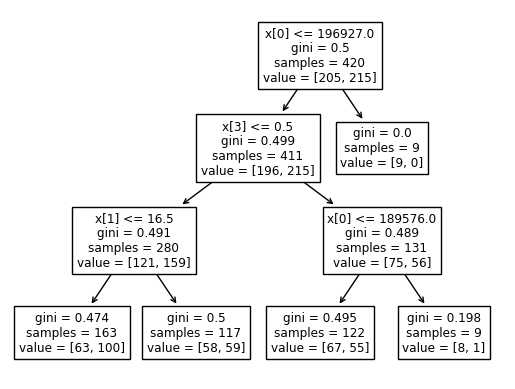

In [154]:
tree.plot_tree(model);

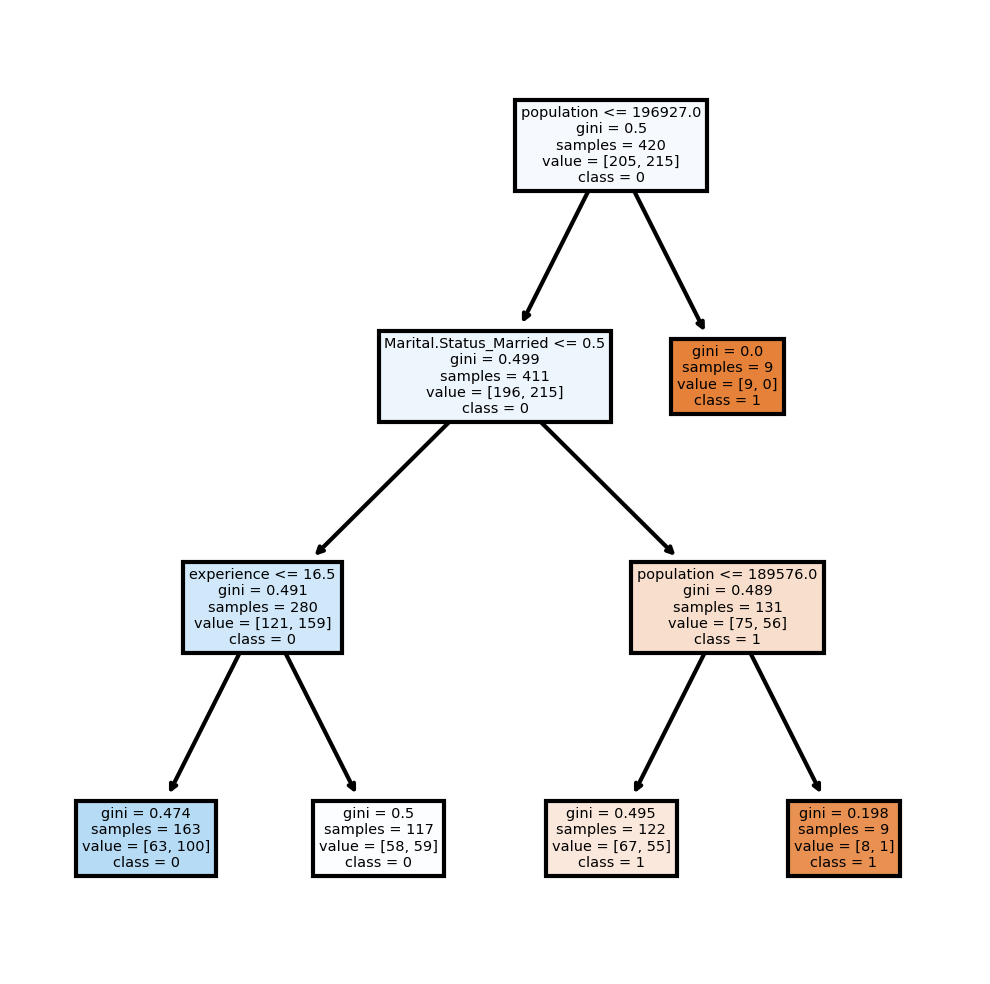

In [155]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,feature_names = fn,class_names=cn,filled = True);
     